# Movie Genre Data Analysis

## Introduction

This is a data sample taken from IMDb's website and includes a comprehensive list of movies, their genres, ratings, and profits.

Here are some things I want to look at:

### Research Questions
1. Which genres are the most common (number of movies made)?
2. Which genres have high avg. budget, revenue, and profit?
3. Which genres have high avg. popularity?
4. Which genres have highest number of movies with a voting avg. >= 8?
5. How does runtime affect popularity and profit?
6. How does season or month affect movie popularity and profit?

### Research Hypotheses
1. The best movies according to vote avg. return high profit and revenue.
2. The best movies according to popularity return high profit and revenue.
3. Highly budgeted movies don’t always return high revenue and profit.
4. Highly budgeted movies aren’t always popular.
5. Movies with a higher runtime return have higher popularity, vote average, and profit.
6. Movies released during holidays or summer months have higher popularity and profit.

## Project

### First Impressions

**Tasks**
- Import Libraries
- Read CSV
- Look at DataFrame .head() and .info()
- Write Observations

In [9]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
movies = pd.read_csv(r'C:\Users\leost\Downloads\AnalystBuilder\Pandas\Projects\imdb_movies.csv')

In [11]:
movies.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [13]:
pd.set_option('display.max.rows', 11000)
pd.set_option('display.max.columns', 25)

**Observations**
- Many columns not useful, taking up storage. (overview, cast, homepage, etc.)
- 'genres' and 'production_companies' need reformatting to be useful.
- 'budget_adj' and 'revenue_adj' using float64 data type, causing scientific notation.

### Cleaning & Prepping

**Tasks**
- Create Staging DF
- Dealing with Duplicates
- Handling Nulls
- Add 'Profit' column
- Create Filtered DataFrame
- Clean String Data
- Clean DataTypes

In [17]:
# Staging DataFrame, kept in case of errors 
movies_staging = movies.copy

In [18]:
# Dealing with Duplicates
movies[movies.duplicated()]

id    imdb_id  popularity    budget  revenue original_title  \
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline  \
2090  Dwight H. Little  Survival is no game   

                                               keywords  \
2090  martial arts|dystopia|based on video game|mart...   

                                               overview  runtime  \
2090  In the year of 2039, after World Wars destroy ...       92   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date  vote_count  vote_average  release_year  budget_adj  \
2090      3/20/10         110           5.0          2010  30000000.0   

      revenue_adj  
2090     967000.0

In [19]:
movies.drop_duplicates(inplace = True)

In [20]:
# Saw Null values in 'genres', data is not useful for this analysis.
movies.dropna(subset = ['genres'], inplace = True)

In [21]:
# Create 'Profit' column.
movies['profit'] = movies['revenue'] - movies['budget']
movies[['original_title', 'profit']].sort_values('profit', ascending = False).head()

original_title      profit
1386                        Avatar  2544505847
3     Star Wars: The Force Awakens  1868178225
5231                       Titanic  1645034188
0                   Jurassic World  1363528810
4                        Furious 7  1316249360

In [22]:
# Filter columns to keep and use in analysis (remove rest)
movies_genre = movies[['popularity', 'budget', 'revenue', 'profit', 'original_title', 'runtime', 'genres', 'release_date', 'vote_count', 'vote_average']]
# movies_genre

In [23]:
movies_genre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10842 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10842 non-null  float64
 1   budget          10842 non-null  int64  
 2   revenue         10842 non-null  int64  
 3   profit          10842 non-null  int64  
 4   original_title  10842 non-null  object 
 5   runtime         10842 non-null  int64  
 6   genres          10842 non-null  object 
 7   release_date    10842 non-null  object 
 8   vote_count      10842 non-null  int64  
 9   vote_average    10842 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 931.7+ KB


In [24]:
# Correcting 'release_date' datatype.
movies_genre['release_date'] = pd.to_datetime(movies_genre['release_date'])

C:\Users\leost\AppData\Local\Temp\ipykernel_13884\1226931587.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  movies_genre['release_date'] = pd.to_datetime(movies_genre['release_date'])
C:\Users\leost\AppData\Local\Temp\ipykernel_13884\1226931587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_genre['release_date'] = pd.to_datetime(movies_genre['release_date'])


In [25]:
movies_genre.sort_values(by = 'release_date')

popularity     budget     revenue      profit  \
9829     0.289363          0           0           0   
9846     0.065941          0           0           0   
9827     0.292586          0           0           0   
9837     0.186184          0           0           0   
9845     0.056930          0           0           0   
9807     2.234953     400000     5028948     4628948   
9838     0.178136          0           0           0   
9824     0.347121    5000000    34251525    29251525   
9818     0.478232          0    20000000    20000000   
9823     0.392437          0           0           0   
9816     0.513067     300000           0     -300000   
9821     0.438899          0    12484444    12484444   
9810     0.790976    5000000    41833347    36833347   
9831     0.273975          0    14200000    14200000   
9841     0.160002          0           0           0   
9833     0.269347          0           0           0   
9817     0.491393          0           0           0   
9844     0.017468          0           0           0   
9826     0.303521    2200000           0    -2200000   
9806     2.563191    7000000   470654000   463654000   
9835     0.335421          0    30000000    30000000   
9842     0.142927          0           0           0   
9830     0.277357    1800000    46665856    44865856   
9828     0.289443    1500000           0    -1500000   
9808     1.409947    1200000   112892319   111692319   
9847     0.045647          0           0           0   
9848     0.032936          0           0           0   
9812     0.691527          0           0           0   
9820     0.450311          0           0           0   
9822     0.423755    2700000     5000000     2300000   
9813     0.637257          0    27476252    27476252   
9819     0.451933          0           0           0   
9843     0.125881          0           0           0   
9814     0.537981          0           0           0   
9832     0.071830     179000           0     -179000   
9840     0.162767          0     8022000     8022000   
9839     0.167481          0           0           0   
9834     0.201765          0           0           0   
9805     3.258151    3000000   108981275   105981275   
9815     0.527888          0           0           0   
9811     0.699683          0           0           0   
9809     1.019569   11000000    20000000     9000000   
9825     0.328246          0           0           0   
9836     0.222136   15000000           0   -15000000   
10173    2.582657    1300000    28262574    26962574   
10195    0.325504          0           0           0   
10204    0.214658          0           0           0   
10199    0.564342    1500000           0    -1500000   
10179    0.850090    8500000    70600000    62100000   
10218    0.017498   35000000    35323292      323292   
10181    0.600495    2000000     7900000     5900000   
10184    0.515387          0           0           0   
10216    0.042353          0           0           0   
10215    0.116673          0           0           0   
10196    0.317676          0           0           0   
10176    0.999413    2800000    60922980    58122980   
10206    0.194746          0           0           0   
10217    0.028606          0           0           0   
10210    0.456174          0           0           0   
10177    0.924068    9000000    25000000    16000000   
10188    0.672483          0           0           0   
10205    0.196999          0           0           0   
10182    0.597297    3700000    31800000    28100000   
10212    0.126723          0           0           0   
10209    0.134420          0           0           0   
10203    0.569865          0           0           0   
10193    0.328263          0           0           0   
10192    0.329543          0           0           0   
10178    0.886830   24000000    52614445    28614445   
10211    0.128027          0           0           0   
10219    0.002381          0   

In [26]:
movies_genre['release_date'].max()

Timestamp('2074-12-20 00:00:00')

In [27]:
movies_genre['release_date'].min()

Timestamp('1975-01-01 00:00:00')

In [28]:
# Years before 1975 were converted incorrectly. Repairing.
movies_genre.loc[movies_genre['release_date'].dt.year > 2025, 'release_date'] -= pd.DateOffset(years=100)

In [29]:
# Splitting Genre Strings.
movies_genre['genres'].str.split('|').apply(Series,1).stack()

C:\Users\leost\AppData\Local\Temp\ipykernel_13884\3771292798.py:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  movies_genre['genres'].str.split('|').apply(Series,1).stack()


0      0             Action
       1          Adventure
       2    Science Fiction
       3           Thriller
1      0             Action
                 ...       
10863  0            Mystery
       1             Comedy
10864  0             Action
       1             Comedy
10865  0             Horror
Length: 26955, dtype: object

In [30]:
# Removing extra index to ensure values match original rows/indexes.
# Then, removing old 'genres' column and inserting new columns.
split = movies_genre['genres'].str.split('|').apply(Series,1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'
movies_genre_split = movies_genre.join(split)
del movies_genre_split['genres']

C:\Users\leost\AppData\Local\Temp\ipykernel_13884\2777700020.py:3: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre['genres'].str.split('|').apply(Series,1).stack()


In [31]:
movies_genre_split

popularity     budget     revenue      profit  \
0       32.985763  150000000  1513528810  1363528810   
0       32.985763  150000000  1513528810  1363528810   
0       32.985763  150000000  1513528810  1363528810   
0       32.985763  150000000  1513528810  1363528810   
1       28.419936  150000000   378436354   228436354   
...           ...        ...         ...         ...   
10863    0.065141          0           0           0   
10863    0.065141          0           0           0   
10864    0.064317          0           0           0   
10864    0.064317          0           0           0   
10865    0.035919      19000           0      -19000   

                 original_title  runtime release_date  vote_count  \
0                Jurassic World      124   2015-06-09        5562   
0                Jurassic World      124   2015-06-09        5562   
0                Jurassic World      124   2015-06-09        5562   
0                Jurassic World      124   2015-06-09        5562   
1            Mad Max: Fury Road      120   2015-05-13        6185   
...                         ...      ...          ...         ...   
10863       Beregis Avtomobilya       94   1966-01-01          11   
10863       Beregis Avtomobilya       94   1966-01-01          11   
10864    What's Up, Tiger Lily?       80   1966-11-02          22   
10864    What's Up, Tiger Lily?       80   1966-11-02          22   
10865  Manos: The Hands of Fate       74   1966-11-15          15   

       vote_average     genres_split  
0               6.5           Action  
0               6.5        Adventure  
0               6.5  Science Fiction  
0               6.5         Thriller  
1               7.1           Action  
...             ...              ...  
10863           6.5          Mystery  
10863           6.5           Comedy  
10864           5.4           Action  
10864           5.4           Comedy  
10865           1.5           Horror  

[26955 rows x 10 columns]

In [32]:
movies_genre_split.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26955 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      26955 non-null  float64       
 1   budget          26955 non-null  int64         
 2   revenue         26955 non-null  int64         
 3   profit          26955 non-null  int64         
 4   original_title  26955 non-null  object        
 5   runtime         26955 non-null  int64         
 6   release_date    26955 non-null  datetime64[ns]
 7   vote_count      26955 non-null  int64         
 8   vote_average    26955 non-null  float64       
 9   genres_split    26955 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 2.3+ MB


### Exploratory Analysis

#### 1. Which genres are the most common (number of movies made)?

In [35]:
# Finding count using groupby.
movies_genre_split.groupby('genres_split')['original_title'].count().sort_values(ascending = False)

genres_split
Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: original_title, dtype: int64

In [36]:
# Converting to DataFrame.
genres_count = pd.DataFrame(movies_genre_split.groupby('genres_split').original_title.nunique()).sort_values('original_title', ascending = True)
genres_count

original_title
genres_split                   
Western                     163
TV Movie                    167
Foreign                     188
War                         269
History                     331
Music                       403
Documentary                 520
Animation                   697
Mystery                     796
Fantasy                     899
Science Fiction            1207
Family                     1211
Crime                      1337
Adventure                  1442
Horror                     1580
Romance                    1686
Action                     2339
Thriller                   2841
Comedy                     3750
Drama                      4672

<Axes: title={'center': 'Movies Per Genre Percentages'}>

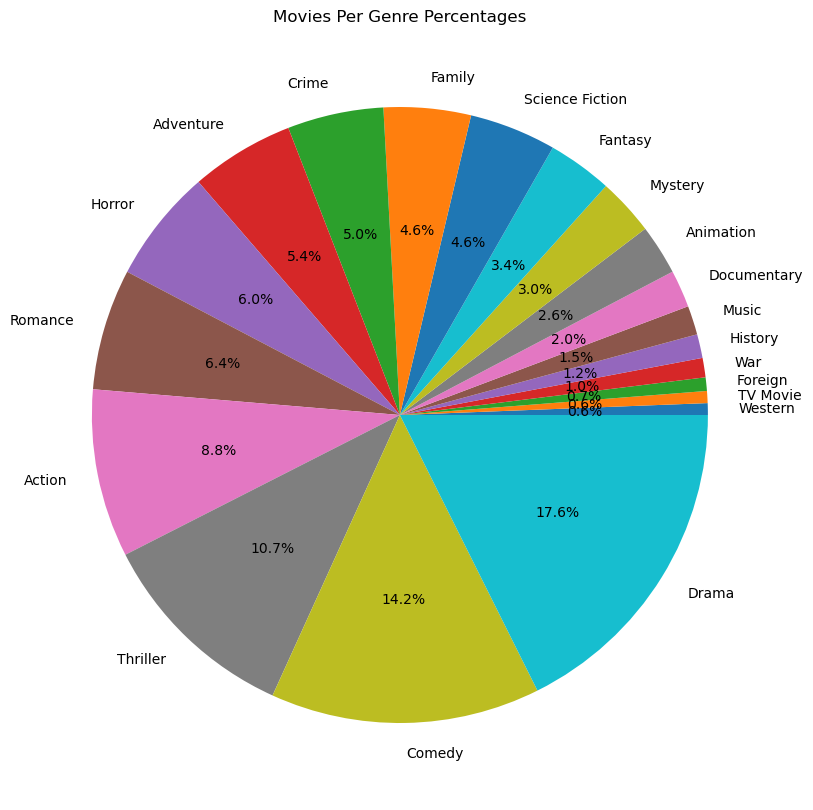

In [37]:
genres_count['original_title'].plot.pie(title = 'Movies Per Genre Percentages', ylabel = '', autopct= '%1.1f%%', figsize = (10, 10))

<Axes: title={'center': 'Movies Per Genre'}, ylabel='Genres'>

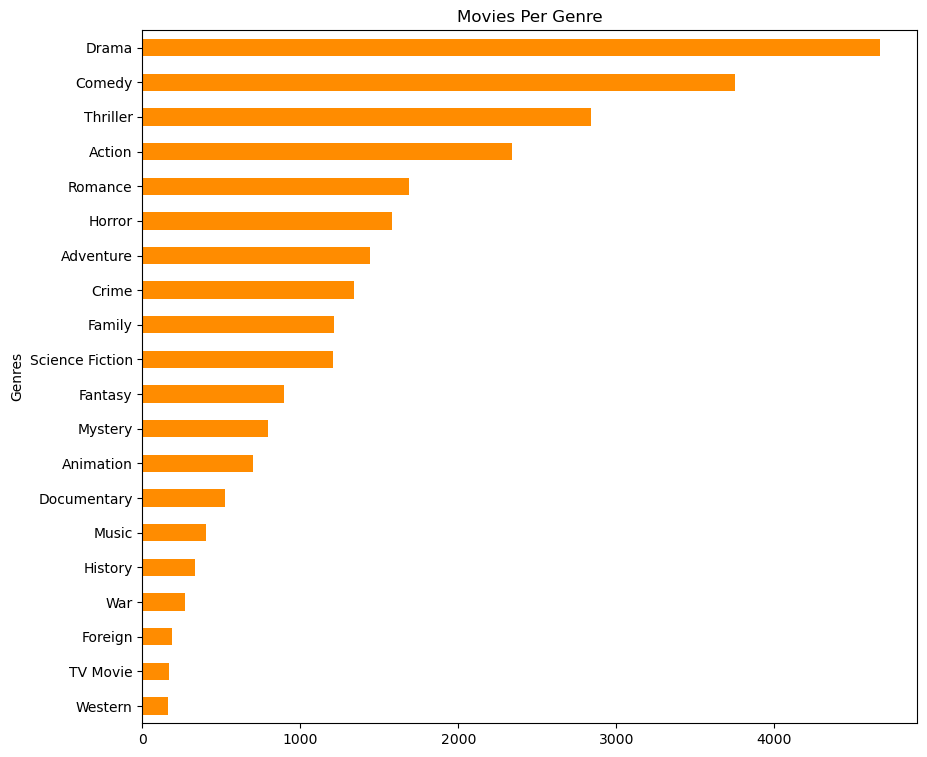

In [38]:
genres_count['original_title'].plot.barh(title = 'Movies Per Genre', ylabel = 'Genres', color = 'DarkOrange', figsize = (10, 9))

**Observations**
- As visible in graphs above, Drama, Comedy, and Thriller have the highest movie count and make up the largest percentage of total genres.

#### 2. Which genres have high avg. budget, revenue, and profit?

In [41]:
# Finding average using groupby.
genres_avg = movies_genre_split.groupby('genres_split').mean(numeric_only = True)
pd.options.display.float_format = '{:2f}'.format

genres_avg

popularity          budget          revenue          profit  \
genres_split                                                                   
Action             0.926274 27727820.331376  72794732.002517 45066911.671141   
Adventure          1.154259 37543694.530931 113137861.069341 75594166.538409   
Animation          0.852182 23159781.606581  75256062.223176 52096280.616595   
Comedy             0.592607 13297915.618244  37526242.072238 24228326.453994   
Crime              0.744930 17663801.124815  42368661.645495 24704860.520679   
Documentary        0.181432   577149.148077   2041106.994231  1463957.846154   
Drama              0.591495 11880717.773529  29232255.725840 17351537.952311   
Family             0.786668 23359337.420796  72433176.373680 49073838.952884   
Fantasy            0.992840 32612585.348253  96313657.081878 63701071.733624   
Foreign            0.191496  1451434.925532   1520459.835106    69024.909574   
History            0.575936 18594919.302395  32011793.215569 13416873.913174   
Horror             0.465357  6226529.210751  16822808.624313 10596279.413561   
Music              0.487321  9438627.549020  28571768.691176 19133141.142157   
Mystery            0.690012 16119270.062963  40217566.661728 24098296.598765   
Romance            0.592082 12531271.847547  35691972.327103 23160700.479556   
Science Fiction    1.001548 24972680.524003  70140558.034174 45167877.510171   
TV Movie           0.270896   267664.670659    251497.005988   -16167.664671   
Thriller           0.741563 17207693.769178  41728417.543860 24520723.774682   
War                0.727683 20891886.103704  47605183.300000 26713297.196296   
Western            0.590615 18974107.975758  28568709.284848  9594601.309091   

                   runtime  vote_count  vote_average  
genres_split                                          
Action          104.917785  392.993708      5.787752  
Adventure       106.173351  513.125085      5.940585  
Animation        68.181688  303.000000      6.403147  
Comedy           96.745057  176.436330      5.905167  
Crime           106.917282  278.805022      6.124889  
Documentary     102.651923   35.105769      6.908462  
Drama           110.478151  182.544538      6.165546  
Family           89.603574  272.320877      5.997563  
Fantasy         100.736900  420.741266      5.863537  
Foreign         107.228723   16.627660      5.981383  
History         136.206587  183.772455      6.410479  
Horror           94.424557  120.059866      5.337447  
Music           105.137255  124.340686      6.480392  
Mystery         105.928395  236.998765      5.946790  
Romance         106.891355  166.070678      6.042874  
Science Fiction  99.419854  437.096013      5.665582  
TV Movie         91.982036   34.365269      5.788024  
Thriller        103.247678  255.484348      5.750671  
War             127.625926  270.733333      6.297778  
Western         117.575758  205.739394      6.083030

In [42]:
genres_avg.sort_values('profit', ascending = True, inplace = True)

<Axes: title={'center': 'Budget and Revenue by Genre'}, ylabel='Genres'>

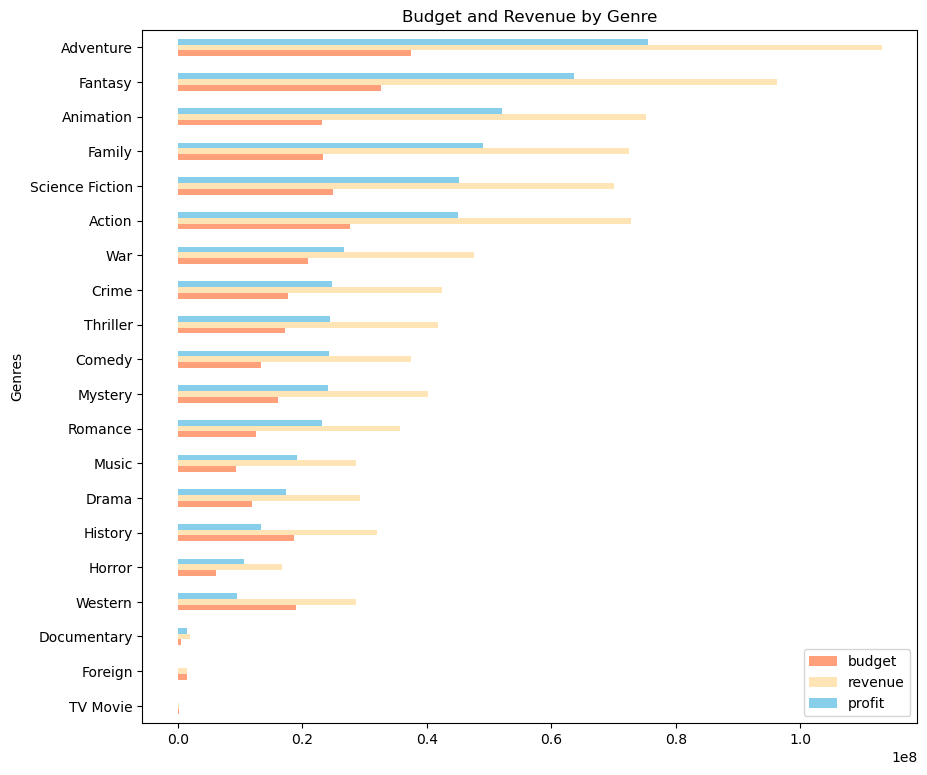

In [43]:
genres_avg[['budget','revenue','profit']].plot.barh(title = 'Budget and Revenue by Genre', ylabel = 'Genres',  color = ('lightsalmon', 'moccasin','skyblue'), figsize = (10, 9))

**Observations**
- Highest Profit: Adventure, Fantasy, and Animation
- Highest Budget: Adventure, Fantasy, Action
- Highest Revenue: Adventure, Fantasy, and Animation

Could be interesting to look at percentage between profit and budget per genre, rather than gross average.

#### 3. Which genres have high avg. popularity?

In [46]:
# Can reuse the genres_avg dataframe.
genres_avg.sort_values('popularity', ascending = True, inplace = True)

In [2]:
genres_avg['popularity'].plot.barh(title = 'Budget and Popularity by Genre', ylabel = 'Genres', color = 'yellowgreen', figsize = (10, 9))

NameError: name 'genres_avg' is not defined

**Observations**
- The three most popular genres on average are Adventure, Science Fiction, and Fantasy

#### 4. Which genres have highest number of movies with a voting avg. >= 8?

In [50]:
# Look back at our filtered table with the split genres column.
movies_genre_split.head()

popularity     budget     revenue      profit      original_title  runtime  \
0   32.985763  150000000  1513528810  1363528810      Jurassic World      124   
0   32.985763  150000000  1513528810  1363528810      Jurassic World      124   
0   32.985763  150000000  1513528810  1363528810      Jurassic World      124   
0   32.985763  150000000  1513528810  1363528810      Jurassic World      124   
1   28.419936  150000000   378436354   228436354  Mad Max: Fury Road      120   

  release_date  vote_count  vote_average     genres_split  
0   2015-06-09        5562      6.500000           Action  
0   2015-06-09        5562      6.500000        Adventure  
0   2015-06-09        5562      6.500000  Science Fiction  
0   2015-06-09        5562      6.500000         Thriller  
1   2015-05-13        6185      7.100000           Action

In [51]:
# Filtering out movies with low vote counts to avoid skewed data.
movies_genre_split[(movies_genre_split['vote_count'] > 50) & (movies_genre_split['vote_average'] >= 8)]

popularity     budget     revenue     profit  \
9        6.326804  175000000   853708609  678708609   
9        6.326804  175000000   853708609  678708609   
9        6.326804  175000000   853708609  678708609   
35       3.557846    6000000    35401758   29401758   
35       3.557846    6000000    35401758   29401758   
609      0.033378          0           0          0   
629     24.949134  165000000   621752480  456752480   
629     24.949134  165000000   621752480  456752480   
629     24.949134  165000000   621752480  456752480   
636      8.110711   14000000   233555708  219555708   
636      8.110711   14000000   233555708  219555708   
636      8.110711   14000000   233555708  219555708   
636      8.110711   14000000   233555708  219555708   
650      4.780419    3300000    13993093   10693093   
650      4.780419    3300000    13993093   10693093   
718      1.737699    4900000     3494070   -1405930   
736      1.376670          0      857522     857522   
736      1.376670          0      857522     857522   
736      1.376670          0      857522     857522   
826      0.705700          0           0          0   
826      0.705700          0           0          0   
826      0.705700          0           0          0   
826      0.705700          0           0          0   
826      0.705700          0           0          0   
2075     0.629432          0     8212430    8212430   
2409     8.947905   63000000   100853753   37853753   
2414     2.719461   60000000   284600000  224600000   
2414     2.719461   60000000   284600000  224600000   
2414     2.719461   60000000   284600000  224600000   
2722     0.537593          0   125000000  125000000   
2722     0.537593          0   125000000  125000000   
2722     0.537593          0   125000000  125000000   
2875     8.466668  185000000  1001921825  816921825   
2875     8.466668  185000000  1001921825  816921825   
2875     8.466668  185000000  1001921825  816921825   
2875     8.466668  185000000  1001921825  816921825   
2959     0.905428          0           0          0   
2959     0.905428          0           0          0   
3310     0.102845          0           0          0   
3310     0.102845          0           0          0   
3690     0.321341          0           0          0   
3690     0.321341          0           0          0   
4177     8.093754    8000000   213928762  205928762   
4177     8.093754    8000000   213928762  205928762   
4178     7.192039   25000000    28341469    3341469   
4178     7.192039   25000000    28341469    3341469   
4179     6.715966   55000000   677945399  622945399   
4179     6.715966   55000000   677945399  622945399   
4179     6.715966   55000000   677945399  622945399   
4434     1.182679          0           0          0   
4434     1.182679          0           0          0   
4434     1.182679          0           0          0   
5611     0.661187          0           0          0   
5611     0.661187          0           0          0   
5827     0.250542          0           0          0   
5827     0.250542          0           0          0   
5914     0.168549   10000000           0  -10000000   
5914     0.168549   10000000           0  -10000000   
7269     5.738034    6000000   245066411  239066411   
7269     5.738034    6000000   245066411  239066411   
7309     5.488441   18000000   538400000  520400000   
7309     5.488441   18000000   538400000  520400000   
7309     5.488441   18000000   538400000  520400000   
8069     3.440238    6000000    23341568   17341568   
8069     3.440238    6000000    23341568   17341568   
8069     3.440238    6000000    23341568   17341568   
8987     1.333006   20000000    23875127    3875127   
9549     0.211124          0           0          0   
9549     0.211124          0           0          0   
9549     0.211124          0           0          0   
9758     3.264571   13000000    47542841   34542841   
9758     3.264571   13000000    47542841   3454

In [52]:
vote_zero = movies_genre_split[movies_genre_split['vote_average'] >= 8]
vote_fifty = movies_genre_split[(movies_genre_split['vote_count'] > 50) & (movies_genre_split['vote_average'] >= 8)]
vote_thousand = movies_genre_split[(movies_genre_split['vote_count'] > 1000) & (movies_genre_split['vote_average'] >= 8)]

In [53]:
# Creating vote averages for 'vote_fifty' using groupby.
genres_vote = pd.DataFrame(vote_zero.groupby('genres_split').vote_average.nunique()).sort_values('vote_average', ascending = True)
genres_vote

vote_average
genres_split                 
Family                      1
Action                      2
Mystery                     2
History                     2
Fantasy                     2
Adventure                   2
War                         2
Horror                      3
Romance                     3
Science Fiction             3
Thriller                    4
Animation                   4
Crime                       4
Comedy                      5
Drama                       6
Music                       8
Documentary                 9

<Axes: title={'center': 'Vote Average by Genre'}, ylabel='Genres'>

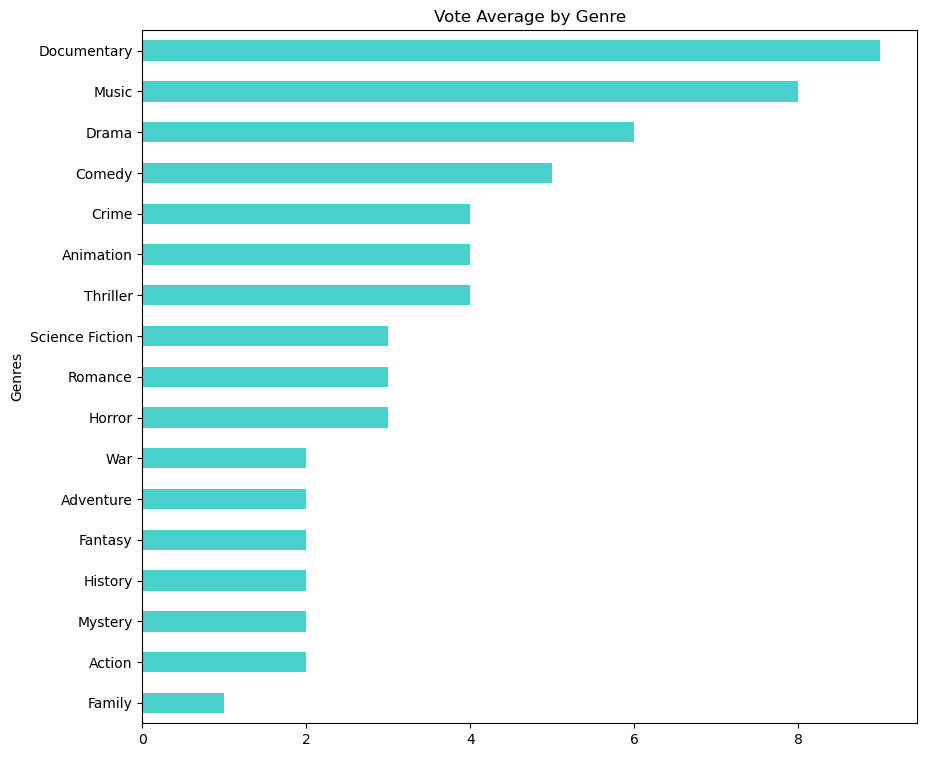

In [54]:
# Visualizing.
genres_vote['vote_average'].plot.barh(title = 'Vote Average by Genre', ylabel = 'Genres', color = 'mediumturquoise', figsize = (10, 9))

<Axes: title={'center': 'Vote Average by Genre'}, ylabel='Genres'>

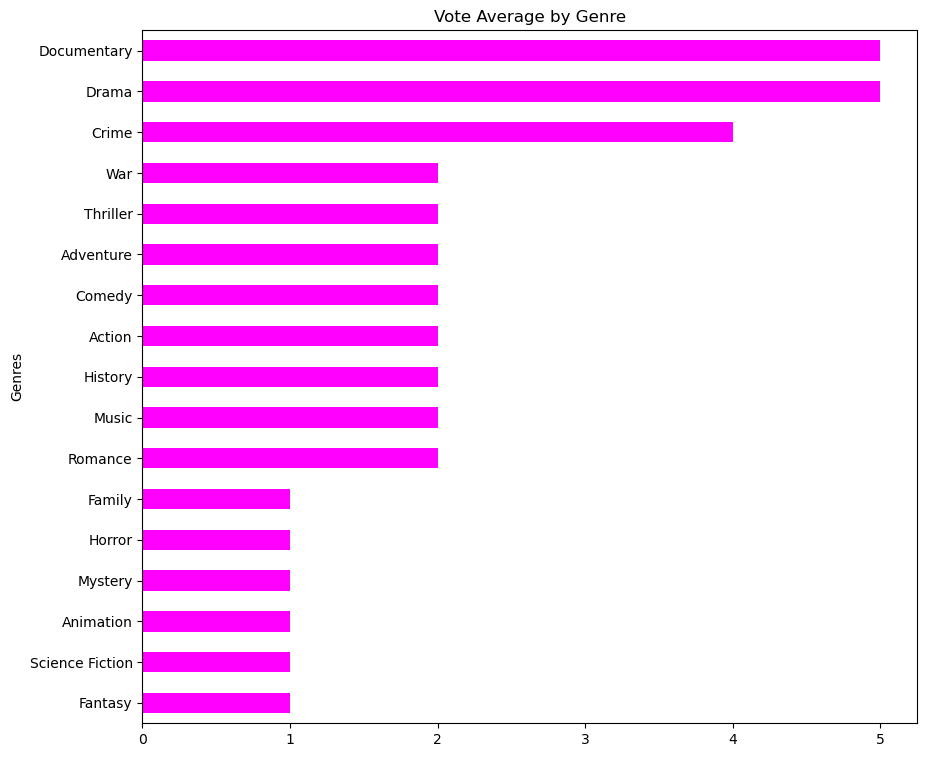

In [55]:
# Repeating for 'vote_fifty'.
genres_vote_fifty = pd.DataFrame(vote_fifty.groupby('genres_split').vote_average.nunique()).sort_values('vote_average', ascending = True)
genres_vote_fifty['vote_average'].plot.barh(title = 'Vote Average by Genre', ylabel = 'Genres', color = 'magenta', figsize = (10, 9))

<Axes: title={'center': 'Vote Average by Genre'}, ylabel='Genres'>

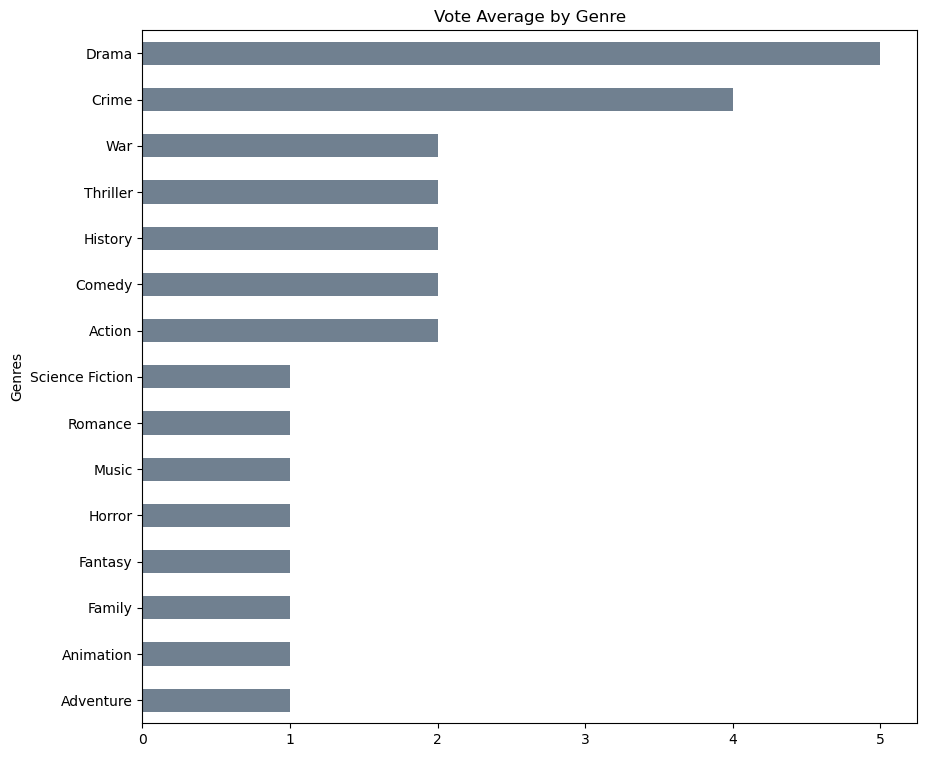

In [56]:
# Repeating for 'vote_thousand'.
genres_vote_thousand = pd.DataFrame(vote_thousand.groupby('genres_split').vote_average.nunique()).sort_values('vote_average', ascending = True)
genres_vote_thousand['vote_average'].plot.barh(title = 'Vote Average by Genre', ylabel = 'Genres', color = 'slategray', figsize = (10, 9))

**Observations**
- As you narrow down movies based on vote count, the data feels more accurate and resonant with other observations we've made.
- Using our filtered set, the genres with the highest vote average are: Drama, Crime, followed by a five way tie (War, Thriller, History, Comedy, Action)
- Including all movies, the genres with the highest vote average are: Documentary, Music, Drama.

#### 5. How does runtime affect popularity and profit?

In [59]:
movies_genre.head()

popularity     budget     revenue      profit  \
0   32.985763  150000000  1513528810  1363528810   
1   28.419936  150000000   378436354   228436354   
2   13.112507  110000000   295238201   185238201   
3   11.173104  200000000  2068178225  1868178225   
4    9.335014  190000000  1506249360  1316249360   

                 original_title  runtime  \
0                Jurassic World      124   
1            Mad Max: Fury Road      120   
2                     Insurgent      119   
3  Star Wars: The Force Awakens      136   
4                     Furious 7      137   

                                      genres release_date  vote_count  \
0  Action|Adventure|Science Fiction|Thriller   2015-06-09        5562   
1  Action|Adventure|Science Fiction|Thriller   2015-05-13        6185   
2         Adventure|Science Fiction|Thriller   2015-03-18        2480   
3   Action|Adventure|Science Fiction|Fantasy   2015-12-15        5292   
4                      Action|Crime|Thriller   2015-04-01        2947   

   vote_average  
0      6.500000  
1      7.100000  
2      6.300000  
3      7.500000  
4      7.300000

<Axes: xlabel='runtime', ylabel='profit'>

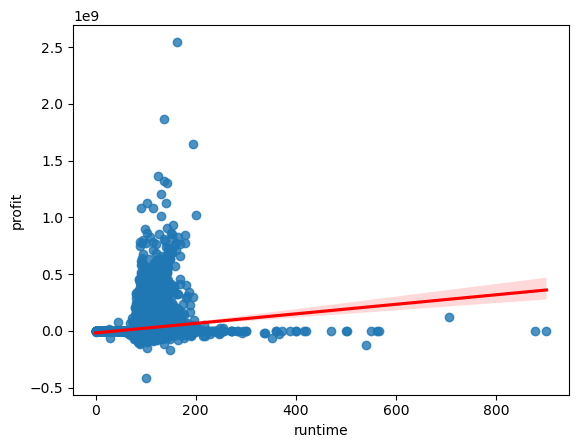

In [161]:
sns.regplot(movies_genre, x = 'runtime', y = 'profit', line_kws = {'color':'red'})

<Axes: xlabel='runtime', ylabel='popularity'>

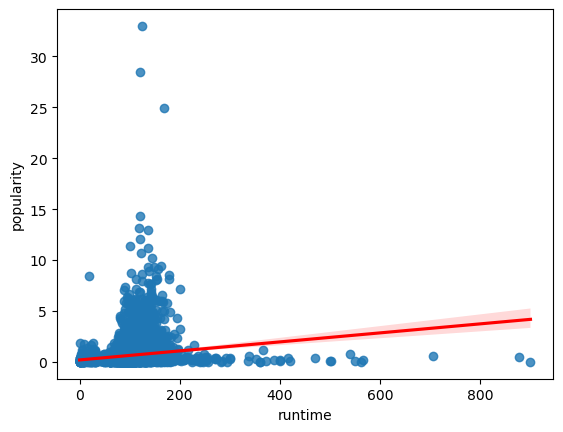

In [199]:
sns.regplot(movies_genre, x = 'runtime', y = 'popularity', line_kws = {'color':'red'})

<Axes: xlabel='runtime', ylabel='vote_average'>

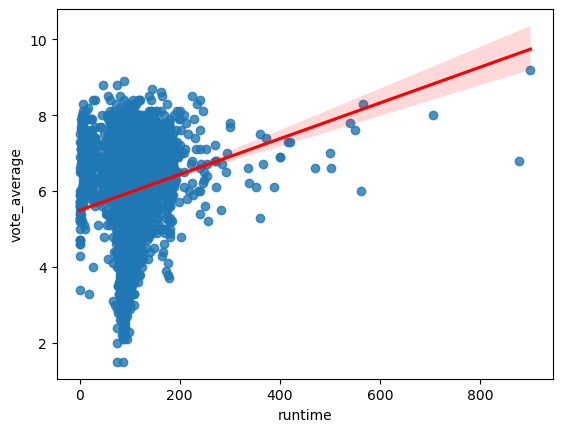

In [164]:
sns.regplot(movies_genre, x = 'runtime', y = 'vote_average', line_kws = {'color':'red'})

**Observations**
- Looks like there is a slightly positive correlation between runtime and profit/popularity, but the bulk of the films that perform better sit within the 1.5 to 3 hour range. 
- Vote Average increases even more with runtime, suggesting that these films are appreciated more after they release or by people with greater interest in films.

#### 6. How does season or month affect movie popularity and profit?

C:\Users\leost\AppData\Local\Temp\ipykernel_13884\3641267841.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_profit, x='release_date', y='profit', palette='viridis')


<Axes: xlabel='release_date', ylabel='profit'>

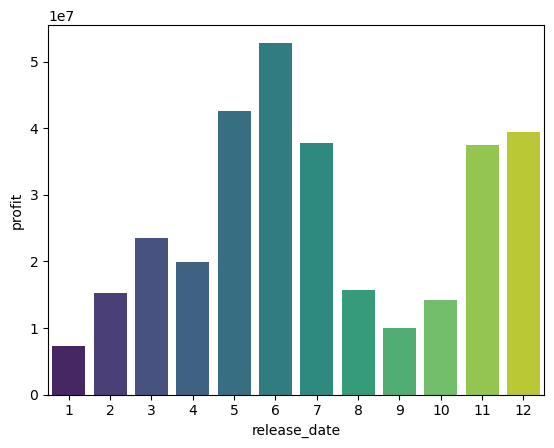

In [191]:
monthly_profit = movies_genre.groupby([movies_genre['release_date'].dt.month])['profit'].mean().reset_index()
sns.barplot(data=monthly_profit, x='release_date', y='profit', palette='viridis')

C:\Users\leost\AppData\Local\Temp\ipykernel_13884\10709426.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_popularity, x='release_date', y='popularity', palette='viridis')


<Axes: xlabel='release_date', ylabel='popularity'>

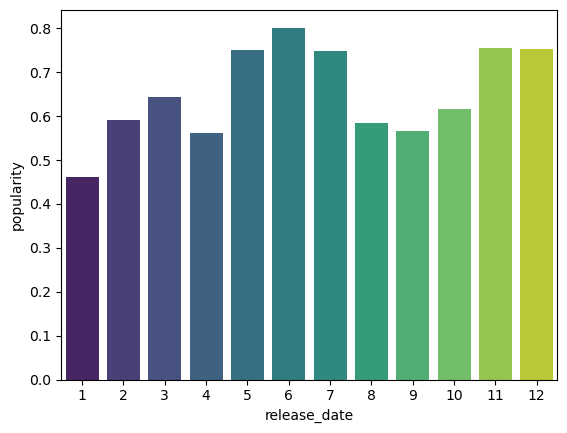

In [204]:
monthly_popularity = movies_genre.groupby([movies_genre['release_date'].dt.month])['popularity'].mean().reset_index()
sns.barplot(data=monthly_popularity, x='release_date', y='popularity', palette='viridis')

**Observations**
- Film popularity and profit seem to spike at the beginning of summer and around the holidays. This matches my hypothesis about seasonal performance trends.

### Comparisons & Hypotheses Testing

**Tasks**
- Recreate DataFrame
- Compare Data
- Test Hypotheses

In [222]:
# Look back at unsplit DataFrame.
movies_genre.head()

popularity     budget     revenue      profit  \
0   32.985763  150000000  1513528810  1363528810   
1   28.419936  150000000   378436354   228436354   
2   13.112507  110000000   295238201   185238201   
3   11.173104  200000000  2068178225  1868178225   
4    9.335014  190000000  1506249360  1316249360   

                 original_title  runtime  \
0                Jurassic World      124   
1            Mad Max: Fury Road      120   
2                     Insurgent      119   
3  Star Wars: The Force Awakens      136   
4                     Furious 7      137   

                                      genres release_date  vote_count  \
0  Action|Adventure|Science Fiction|Thriller   2015-06-09        5562   
1  Action|Adventure|Science Fiction|Thriller   2015-05-13        6185   
2         Adventure|Science Fiction|Thriller   2015-03-18        2480   
3   Action|Adventure|Science Fiction|Fantasy   2015-12-15        5292   
4                      Action|Crime|Thriller   2015-04-01        2947   

   vote_average  
0      6.500000  
1      7.100000  
2      6.300000  
3      7.500000  
4      7.300000

#### 1. The best movies according to vote avg. return high profit and revenue.

In [68]:
# Filtering out low-vote-count movies.
votes_filtered = movies_genre[movies_genre['vote_count'] > 100]

In [69]:
# Looking at Correlation (Using Spearman to better filter out outliers).
votes_filtered.corr(method = 'spearman', numeric_only = True)

popularity    budget  revenue   profit  runtime  vote_count  \
popularity      1.000000  0.410641 0.538221 0.493524 0.221000    0.746419   
budget          0.410641  1.000000 0.697995 0.389021 0.344572    0.485700   
revenue         0.538221  0.697995 1.000000 0.899883 0.320478    0.633864   
profit          0.493524  0.389021 0.899883 1.000000 0.221488    0.583632   
runtime         0.221000  0.344572 0.320478 0.221488 1.000000    0.267604   
vote_count      0.746419  0.485700 0.633864 0.583632 0.267604    1.000000   
vote_average    0.217393 -0.111830 0.067727 0.163290 0.312444    0.311533   

              vote_average  
popularity        0.217393  
budget           -0.111830  
revenue           0.067727  
profit            0.163290  
runtime           0.312444  
vote_count        0.311533  
vote_average      1.000000

<Axes: >

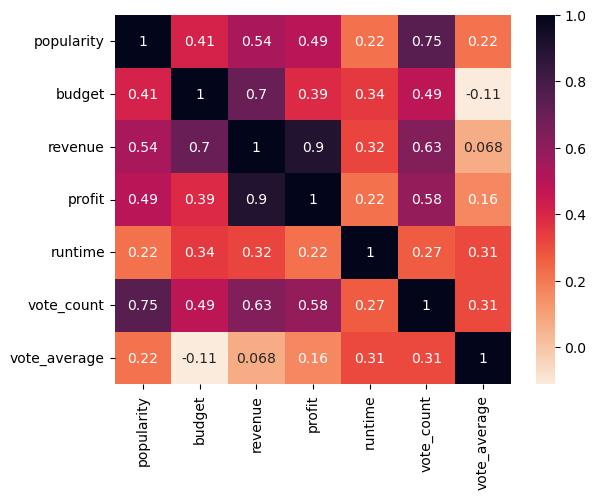

In [70]:
vote_correlation = votes_filtered.corr(method = 'spearman', numeric_only = True)
sns.heatmap(vote_correlation, annot = True, cmap = 'rocket_r')

<Axes: xlabel='vote_average', ylabel='profit'>

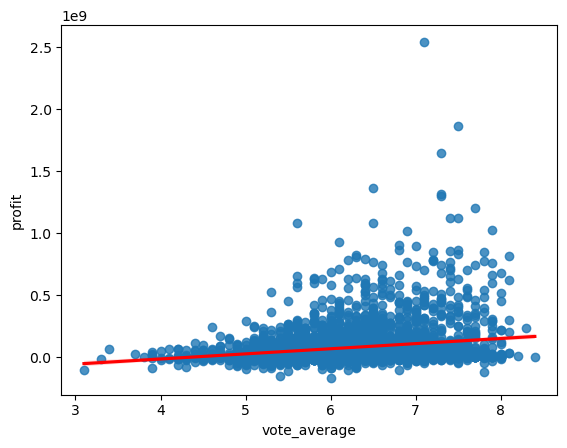

In [159]:
sns.regplot(votes_filtered, x = 'vote_average', y = 'profit', line_kws = {'color':'red'})

<Axes: xlabel='vote_average', ylabel='revenue'>

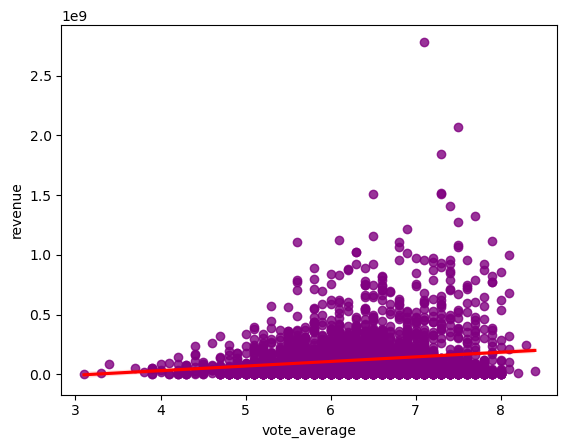

In [72]:
sns.regplot(votes_filtered, x = 'vote_average', y = 'revenue', color = 'purple', line_kws = {'color':'red'})

**Observations**
- Somewhat low correlation between Revenue/Profit and vote average.

#### 2. The best movies according to popularity return high profit and revenue.

In [75]:
votes_filtered.corr(method = 'spearman', numeric_only = True)

popularity    budget  revenue   profit  runtime  vote_count  \
popularity      1.000000  0.410641 0.538221 0.493524 0.221000    0.746419   
budget          0.410641  1.000000 0.697995 0.389021 0.344572    0.485700   
revenue         0.538221  0.697995 1.000000 0.899883 0.320478    0.633864   
profit          0.493524  0.389021 0.899883 1.000000 0.221488    0.583632   
runtime         0.221000  0.344572 0.320478 0.221488 1.000000    0.267604   
vote_count      0.746419  0.485700 0.633864 0.583632 0.267604    1.000000   
vote_average    0.217393 -0.111830 0.067727 0.163290 0.312444    0.311533   

              vote_average  
popularity        0.217393  
budget           -0.111830  
revenue           0.067727  
profit            0.163290  
runtime           0.312444  
vote_count        0.311533  
vote_average      1.000000

<Axes: xlabel='popularity', ylabel='revenue'>

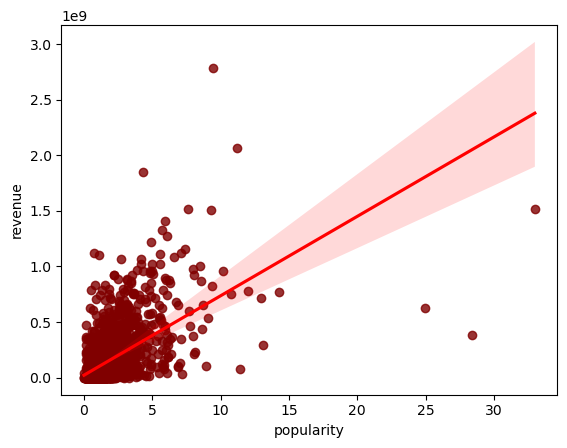

In [76]:
# Popularity vs. Revenue
sns.regplot(votes_filtered, x = 'popularity', y = 'revenue', color = 'maroon', line_kws = {'color':'red'})

<Axes: xlabel='popularity', ylabel='profit'>

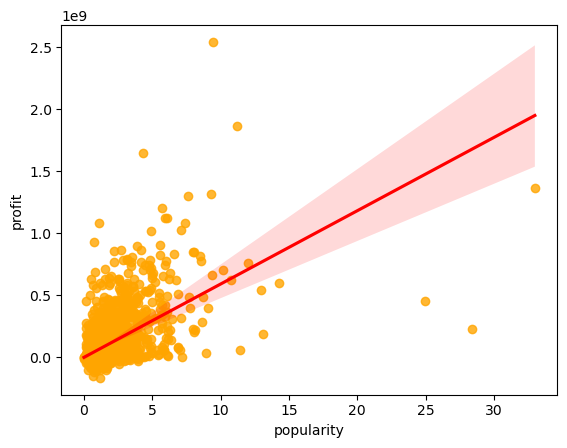

In [77]:
# Popularity vs. Profit
sns.regplot(votes_filtered, x = 'popularity', y = 'profit', color = 'orange', line_kws = {'color':'red'})

**Observations**
- Popularity has a higher correlation to Revenue/Profit.

#### 3. Highly budgeted movies don’t always return high revenue and profit.

In [80]:
votes_filtered.head()

popularity     budget     revenue      profit  \
0   32.985763  150000000  1513528810  1363528810   
1   28.419936  150000000   378436354   228436354   
2   13.112507  110000000   295238201   185238201   
3   11.173104  200000000  2068178225  1868178225   
4    9.335014  190000000  1506249360  1316249360   

                 original_title  runtime  \
0                Jurassic World      124   
1            Mad Max: Fury Road      120   
2                     Insurgent      119   
3  Star Wars: The Force Awakens      136   
4                     Furious 7      137   

                                      genres release_date  vote_count  \
0  Action|Adventure|Science Fiction|Thriller   2015-06-09        5562   
1  Action|Adventure|Science Fiction|Thriller   2015-05-13        6185   
2         Adventure|Science Fiction|Thriller   2015-03-18        2480   
3   Action|Adventure|Science Fiction|Fantasy   2015-12-15        5292   
4                      Action|Crime|Thriller   2015-04-01        2947   

   vote_average  
0      6.500000  
1      7.100000  
2      6.300000  
3      7.500000  
4      7.300000

<Axes: xlabel='budget', ylabel='revenue'>

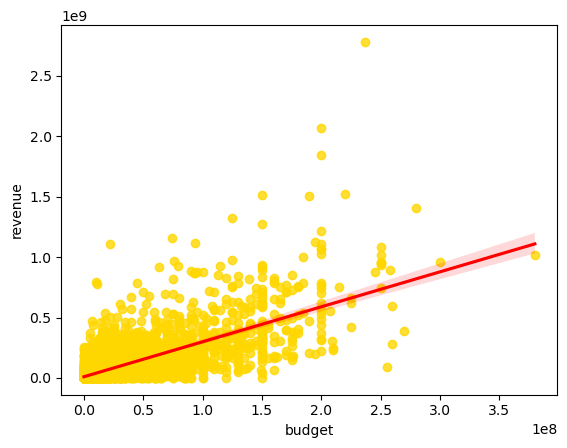

In [81]:
# Budget vs Revenue
sns.regplot(votes_filtered, x = 'budget', y = 'revenue', color = 'gold', line_kws = {'color':'red'})

<Axes: xlabel='budget', ylabel='profit'>

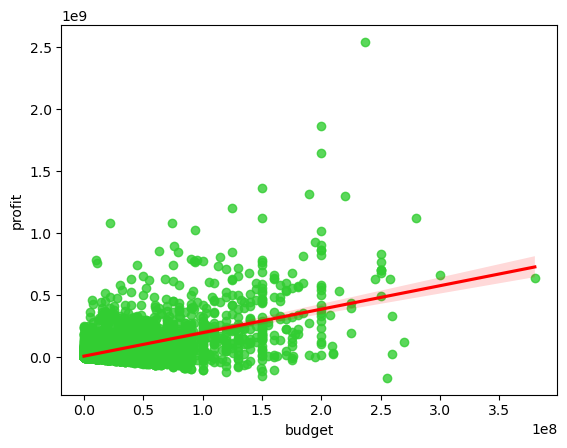

In [82]:
# Budget vs Profit
sns.regplot(votes_filtered, x = 'budget', y = 'profit', color = 'limegreen', line_kws = {'color':'red'})

**Observations**
- Both Profit and Revenue increase at a moderate rate with Budget (relatively average positive correlation).

#### 4. Highly budgeted movies aren’t always popular.

<Axes: xlabel='budget', ylabel='popularity'>

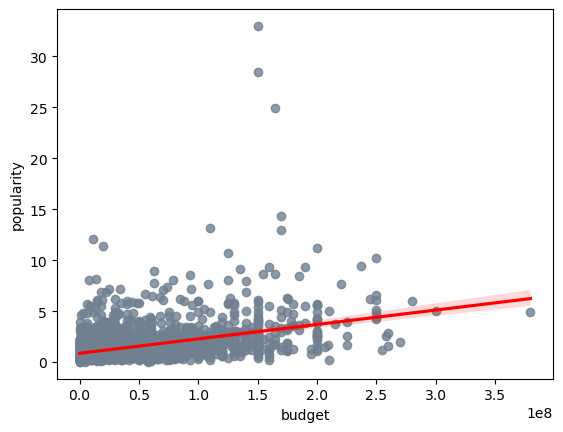

In [85]:
# Budget vs Popularity.
sns.regplot(votes_filtered, x = 'budget', y = 'popularity', color = 'slategray', line_kws = {'color':'red'})

**Observations**
- Low yet positive correlation, several large outlayers with high popularity and average budget.

#### Bonus: Profit per Genre by Year.

In [92]:
# Want to look at Profit per Genre by Year. (Need 'movies_genre_split' DataFrame)
movies_genre_split.head()

popularity     budget     revenue      profit      original_title  runtime  \
0   32.985763  150000000  1513528810  1363528810      Jurassic World      124   
0   32.985763  150000000  1513528810  1363528810      Jurassic World      124   
0   32.985763  150000000  1513528810  1363528810      Jurassic World      124   
0   32.985763  150000000  1513528810  1363528810      Jurassic World      124   
1   28.419936  150000000   378436354   228436354  Mad Max: Fury Road      120   

  release_date  vote_count  vote_average     genres_split  
0   2015-06-09        5562      6.500000           Action  
0   2015-06-09        5562      6.500000        Adventure  
0   2015-06-09        5562      6.500000  Science Fiction  
0   2015-06-09        5562      6.500000         Thriller  
1   2015-05-13        6185      7.100000           Action

In [93]:
movies_genre_split.groupby([movies_genre['release_date'].dt.year,'genres_split'])['profit'].mean()

release_date  genres_split   
1960          Action              6363125.000000
              Adventure            431000.000000
              Comedy              5258750.000000
              Crime                     0.000000
              Drama               8245619.384615
              Family              3333333.333333
              Fantasy             -375000.000000
              Foreign                   0.000000
              History             9600000.000000
              Horror              4389007.428571
              Music                     0.000000
              Romance             5225000.000000
              Science Fiction     -316666.666667
              Thriller            5028842.000000
              War                       0.000000
              Western              484166.666667
1961          Action              2457142.857143
              Adventure          39130002.333333
              Animation         211880014.000000
              Comedy             221980

In [94]:
# Create DataFrame for Visualizing.
time_genre = pd.DataFrame(movies_genre_split.groupby([movies_genre['release_date'].dt.year,'genres_split'])['profit'].mean())
time_genre

profit
release_date genres_split                    
1960         Action            6363125.000000
             Adventure          431000.000000
             Comedy            5258750.000000
             Crime                   0.000000
             Drama             8245619.384615
             Family            3333333.333333
             Fantasy           -375000.000000
             Foreign                 0.000000
             History           9600000.000000
             Horror            4389007.428571
             Music                   0.000000
             Romance           5225000.000000
             Science Fiction   -316666.666667
             Thriller          5028842.000000
             War                     0.000000
             Western            484166.666667
1961         Action            2457142.857143
             Adventure        39130002.333333
             Animation       211880014.000000
             Comedy           22198001.400000
             Crime            18828411.000000
             Drama             4912698.375000
             Family           42576002.800000
             Fantasy                 0.000000
             Foreign                 0.000000
             History           2333333.333333
             Horror             600000.000000
             Music            18828411.000000
             Mystery                 0.000000
             Romance            214285.714286
             Science Fiction         0.000000
             War              11450000.000000
             Western           -566666.666667
1962         Action           10437500.000000
             Adventure        21214285.714286
             Comedy            1599974.800000
             Crime             3709948.666667
             Drama             4373796.190476
             Family            4000000.000000
             Fantasy              -126.000000
             Foreign              -126.000000
             History          11250000.000000
             Horror             231600.000000
             Music             8000000.000000
             Mystery           -245000.000000
             Romance           -400025.200000
             Science Fiction    -31000.000000
             Thriller          7902857.142857
             War              15000000.000000
             Western          13266666.666667
1963         Action           14999691.250000
             Adventure         9428395.000000
             Animation               0.000000
             Comedy             765591.923077
             Crime              369526.750000
             Drama             1587307.692308
             Family            -333333.333333
             Fantasy           -500000.000000
             Foreign                 0.000000
             History           4908750.000000
             Horror             898558.777778
             Mystery           1568014.666667
             Romance           4388698.500000
             Science Fiction   -375000.000000
             Thriller          8612335.300000
             War               1000000.000000
             Western                 0.000000
1964         Action           24280000.000000
             Adventure        24123400.000000
             Animation               0.000000
             Comedy            7080111.375000
             Crime             1723307.300000
             Drama             3726105.550000
             Family           37818181.750000
             Fantasy          24068181.750000
             Foreign                 0.000000
             History                 0.000000
             Horror             -10833.333333
             Music            30354655.200000
             Mystery           1216209.750000
             Romance           6722222.222222
             Science Fiction   -300000.000000
             Thriller         14029426.555556
             War               2546757.333333
             Western                 0.000000
1965         Action           1610450

In [95]:
pd.pivot_table(time_genre, values = 'profit', index = ['genres_split'], columns = ['release_date'])

release_date              1960             1961            1962  \
genres_split                                                      
Action          6363125.000000   2457142.857143 10437500.000000   
Adventure        431000.000000  39130002.333333 21214285.714286   
Animation                  NaN 211880014.000000             NaN   
Comedy          5258750.000000  22198001.400000  1599974.800000   
Crime                 0.000000  18828411.000000  3709948.666667   
Documentary                NaN              NaN             NaN   
Drama           8245619.384615   4912698.375000  4373796.190476   
Family          3333333.333333  42576002.800000  4000000.000000   
Fantasy         -375000.000000         0.000000     -126.000000   
Foreign               0.000000         0.000000     -126.000000   
History         9600000.000000   2333333.333333 11250000.000000   
Horror          4389007.428571    600000.000000   231600.000000   
Music                 0.000000  18828411.000000  8000000.000000   
Mystery                    NaN         0.000000  -245000.000000   
Romance         5225000.000000    214285.714286  -400025.200000   
Science Fiction -316666.666667         0.000000   -31000.000000   
TV Movie                   NaN              NaN             NaN   
Thriller        5028842.000000              NaN  7902857.142857   
War                   0.000000  11450000.000000 15000000.000000   
Western          484166.666667   -566666.666667 13266666.666667   

release_date               1963            1964            1965  \
genres_split                                                      
Action          14999691.250000 24280000.000000 16104504.777778   
Adventure        9428395.000000 24123400.000000 25124276.333333   
Animation              0.000000        0.000000        0.000000   
Comedy            765591.923077  7080111.375000  3264285.714286   
Crime             369526.750000  1723307.300000   -22500.000000   
Documentary                 NaN             NaN             NaN   
Drama            1587307.692308  3726105.550000 11933809.800000   
Family           -333333.333333 37818181.750000 51671428.666667   
Fantasy          -500000.000000 24068181.750000             NaN   
Foreign                0.000000        0.000000        0.000000   
History          4908750.000000        0.000000 -3440000.000000   
Horror            898558.777778   -10833.333333   -60000.000000   
Music                       NaN 30354655.200000 76757143.000000   
Mystery          1568014.666667  1216209.750000        0.000000   
Romance          4388698.500000  6722222.222222 50547239.200000   
Science Fiction  -375000.000000  -300000.000000        0.000000   
TV Movie                    NaN             NaN        0.000000   
Thriller         8612335.300000 14029426.555556 11285049.363636   
War              1000000.000000  2546757.333333 11020224.375000   
Western                0.000000        0.000000  -950000.000000   

release_date              1966             1967            1968  \
genres_split                                                      
Action           324785.714286  21732786.428571  8868478.833333   
Adventure        791563.636364  49281873.857143 15122159.400000   
Animation       -105000.000000 100921706.000000        0.000000   
Comedy          -149550.000000  10135087.470588 -1277777.777778   
Crime           -275560.000000  12899678.714286  6762174.600000   
Documentary           0.000000         0.000000             NaN   
Drama           1014793.062500  18045095.000000  6354859.150000   
Family          -341828.571429  64281204.000000  -640000.000000   
Fantasy               0.000000  -3000000.000000 -2000000.000000   
Foreign               0.000000              NaN             NaN   
History               0.000000              NaN  4433333.333333   
Horror            -6333.333333    -16250.000000  7520356.500000   
Music                      NaN   7200000.000000  2266666.666667   
Mystery         1550000.000000   8459992.6666

Text(0.5, 1.0, 'Genres by Profit per Year')

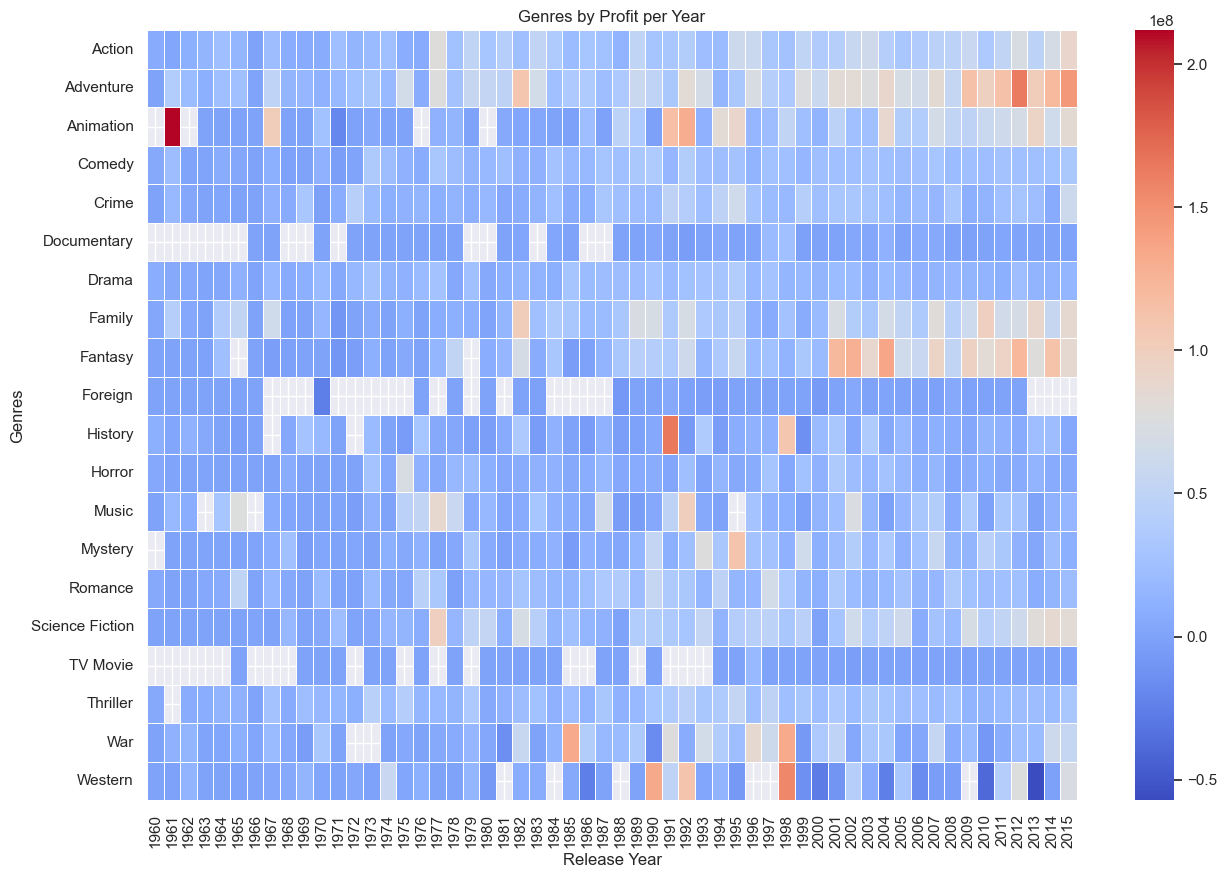

In [216]:
final_genre = pd.pivot_table(time_genre, values = 'profit', index = ['genres_split'], columns = ['release_date'])

sns.set(rc = {'figure.figsize':(15, 10)})
sns.heatmap(final_genre, cmap = 'coolwarm', linewidths = 0.5)
plt.xlabel('Release Year')
plt.ylabel('Genres')
plt.title('Genres by Profit per Year')